In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('/home/tomasz/Desktop/Kodilla/seaborn/HRDataset.csv')

In [3]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,11/24/87,F,Married,US Citizen,No,Black or African American,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,04/26/84,M,Divorced,US Citizen,No,Black or African American,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,09/01/86,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,09/16/85,F,Married,US Citizen,No,White,2/16/2015,04/15/15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,05/19/88,F,Single,US Citizen,No,White,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [4]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)

<Axes: >

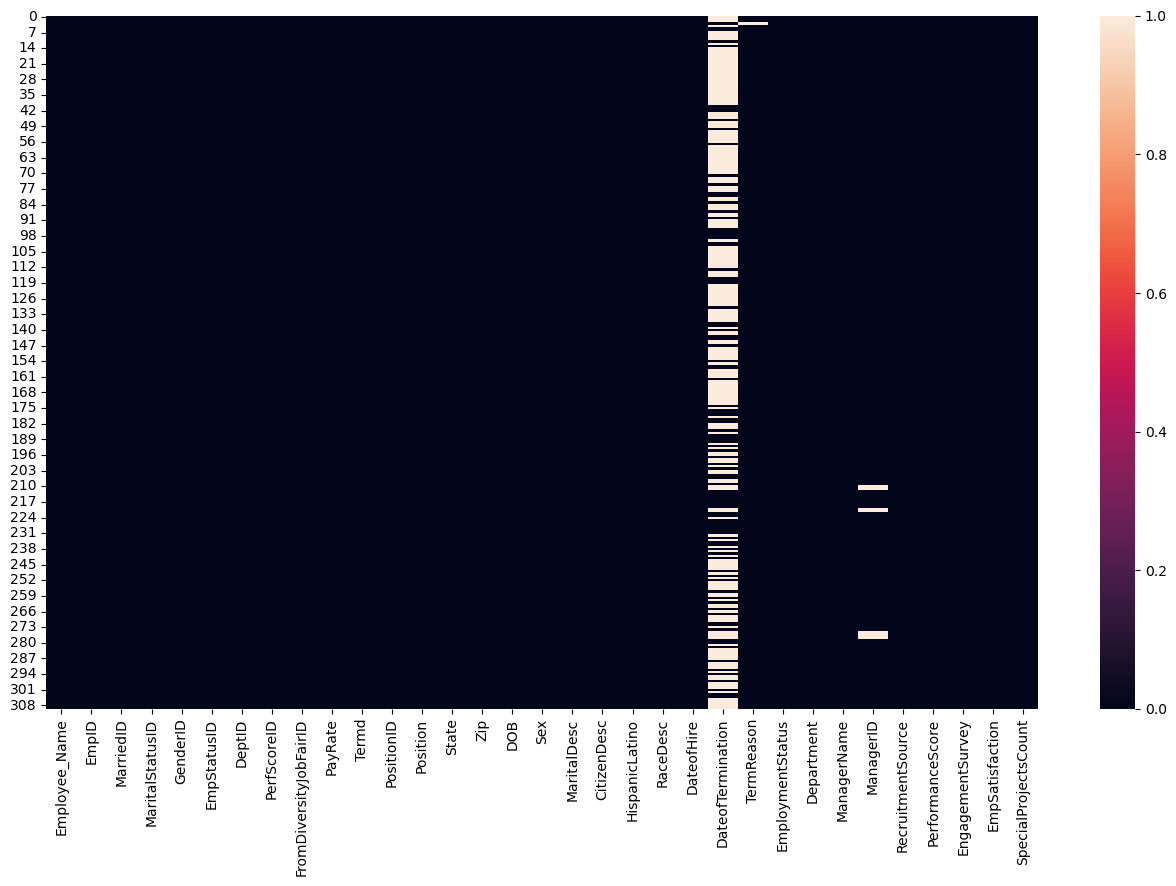

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

# 1. Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym   (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?

In [6]:
sns.set_style('darkgrid')

In [7]:
df['ManagerID'].dtypes

dtype('float64')

In [8]:
df['PerformanceScore'].unique()

array(['Fully Meets', 'PIP', 'Exceeds', 'Needs Improvement'], dtype=object)

In [9]:
def perf_points(row):
    if row =='Fully Meets':
        return 4
    elif row =='PIP':
        return 3
    elif row =='Exceeds':
        return 2
    else:
        return 1
        

In [10]:
df['PerformancePoints']=df['PerformanceScore'].apply(lambda row: perf_points(row))

In [11]:
df[['PerformanceScore','PerformancePoints']].sample(10)

,PerformanceScore,PerformancePoints
159,Fully Meets,4
241,Fully Meets,4
14,Fully Meets,4
187,PIP,3
244,Fully Meets,4
309,Fully Meets,4
155,Fully Meets,4
236,Fully Meets,4
19,Fully Meets,4
48,Fully Meets,4


In [12]:
df['ManagerID'].nunique()

23

<Axes: xlabel='ManagerID', ylabel='PerformancePoints'>

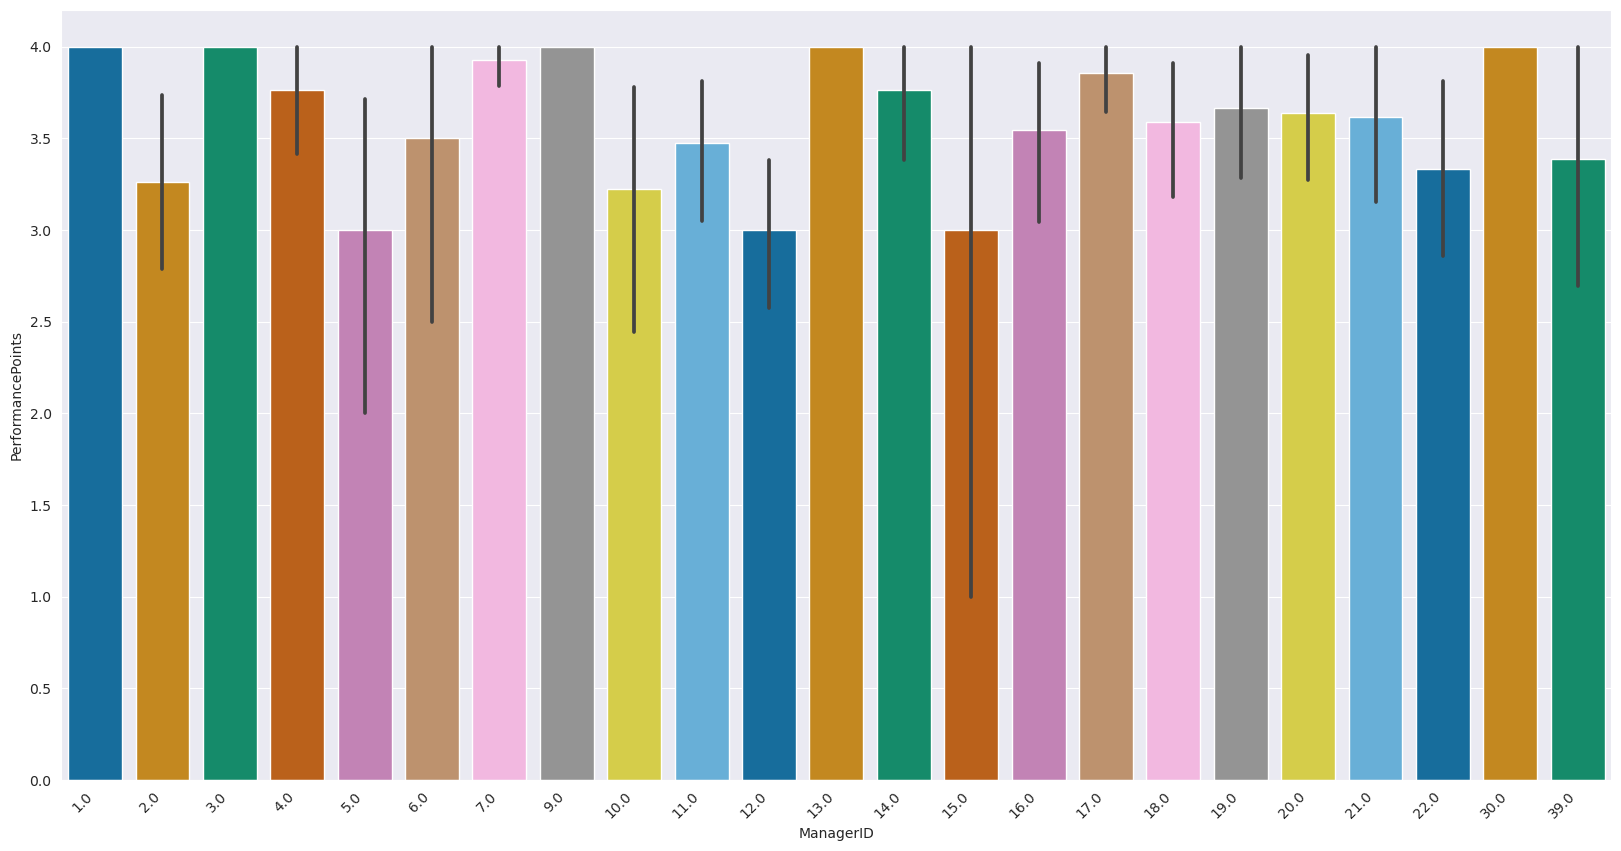

In [35]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ha='right')
sns.barplot(x='ManagerID',y='PerformancePoints',data=df,palette="colorblind",estimator=np.mean)

### Mozemy zauwazyc zaleznosci pomiedzy tym, kto jest bezposrednim przelozonym a ocena wydajnosci pracy danego pracownika

# 2. Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [14]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [15]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [16]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

In [17]:
df['Seniority']

0      10.923288
1       5.726027
2       4.997260
3       0.158904
4       4.410959
         ...    
305     4.882192
306     4.882192
307     3.243836
308     4.882192
309     4.498630
Name: Seniority, Length: 310, dtype: float64

<Axes: xlabel='RecruitmentSource', ylabel='Seniority'>

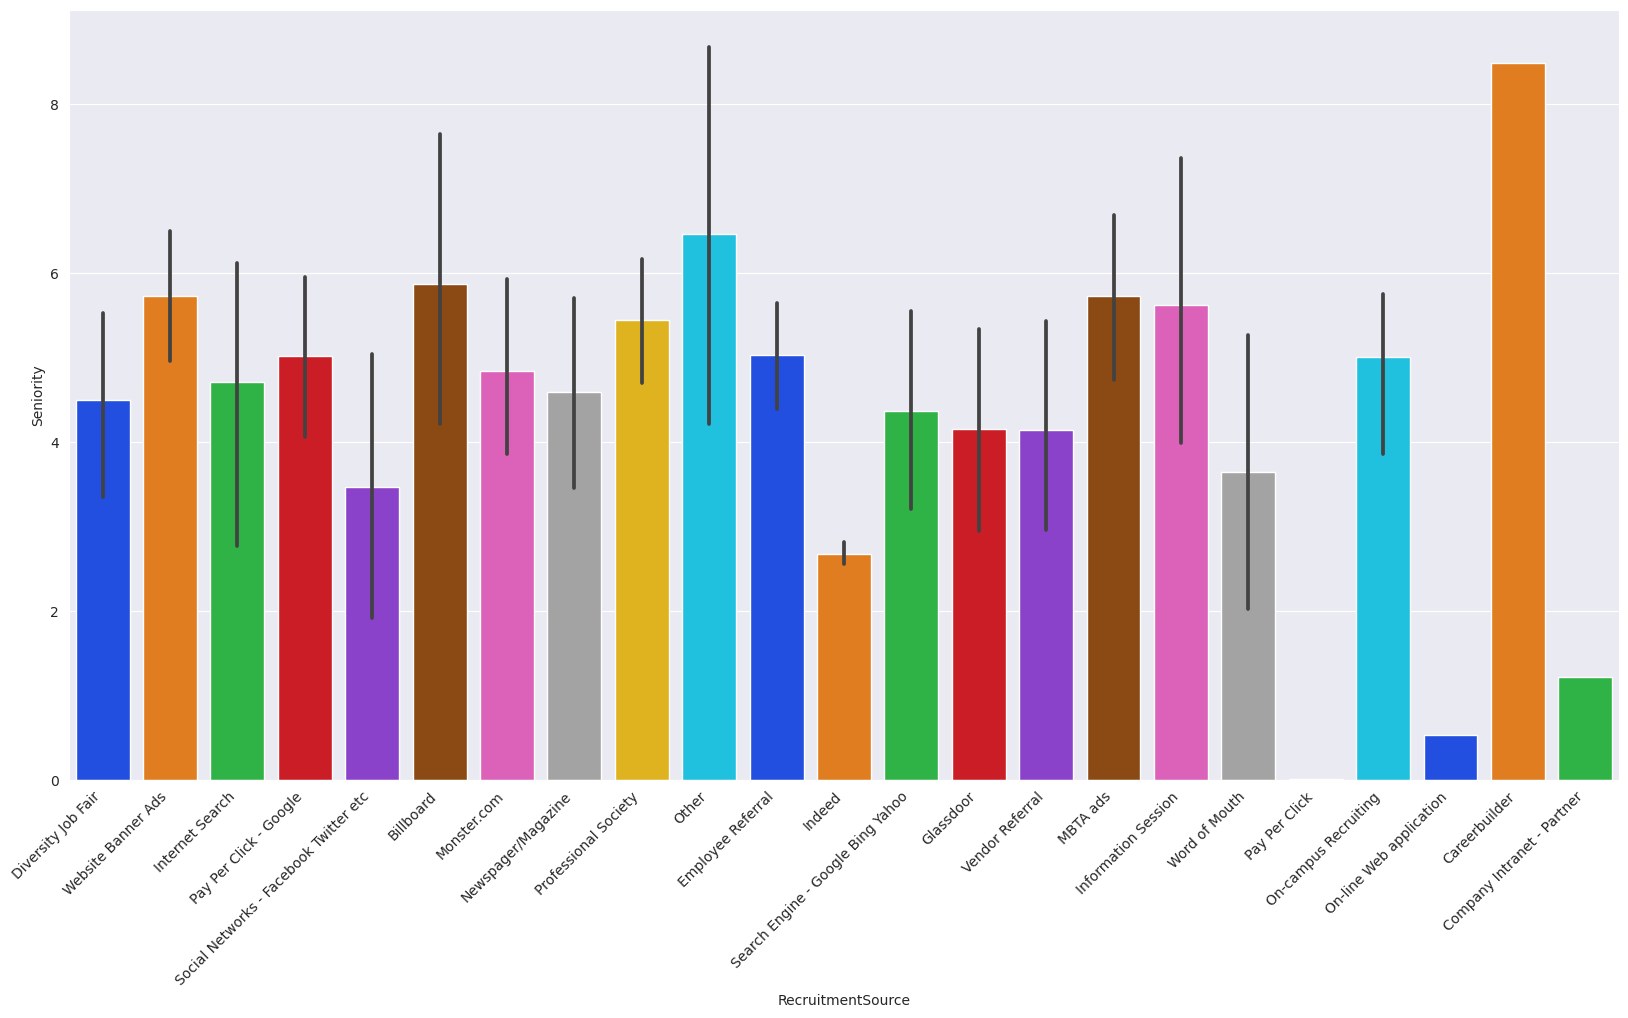

In [46]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45,ha='right')
sns.barplot(x='RecruitmentSource',y='Seniority',data=df,palette="bright",estimator=np.mean)

### Pracownicy z najdluzszym stazem byli pozyskiwani zazwyczaj poprzez strone internetowa Careerbuilder, reklamy MBTA, bilbordy, reklamy na stronach internetowych oraz poprzez inne zrodla

# 3. Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

<Axes: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

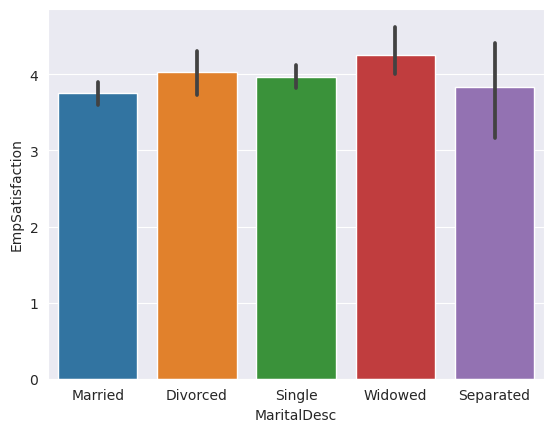

In [20]:
sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

<Axes: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

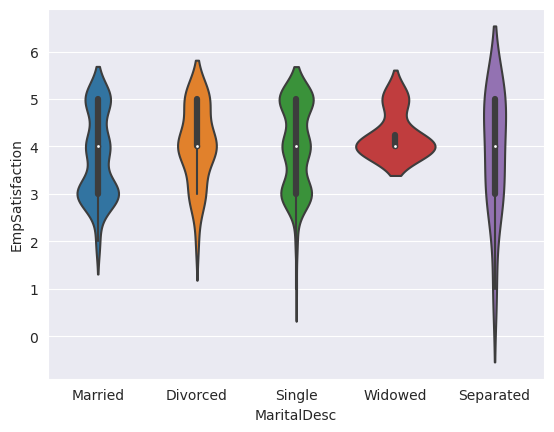

In [22]:
sns.violinplot(x='MaritalDesc',y='EmpSatisfaction', data=df)

<Axes: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

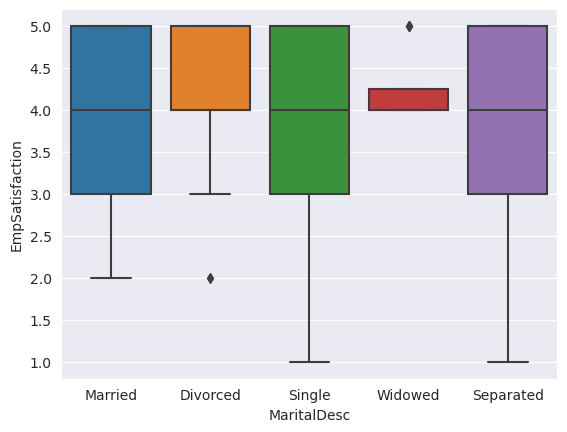

In [23]:
sns.boxplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

### Mozna zauwazyc, ze owdowiali pracownicy wykazuja wieksze zadowolenie z pracy

# 4.Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

In [73]:
# zakladajac, ze osoby ponizej 18 roku zycia nie moga pracowac w tej firmie
def count_age(row):
    if (dt.datetime(2019,9,27)-row['DOB'])/np.timedelta64(1,'Y')<18:
        return None
    else:
        return round((dt.datetime(2019,9,27)-row['DOB'])/np.timedelta64(1,'Y'))

In [74]:
df['age']=df.apply(lambda row : count_age(row),axis=1)
df[['DOB','age']].sample(15)

,DOB,age
240,1981-09-05,38.0
166,1982-11-15,37.0
296,1983-05-06,36.0
74,2068-10-10,NaN
289,1979-05-24,40.0
103,1970-02-11,50.0
259,1987-05-21,32.0
115,2068-07-20,NaN
37,1972-02-09,48.0
291,1979-07-05,40.0


<Axes: xlabel='age', ylabel='Count'>

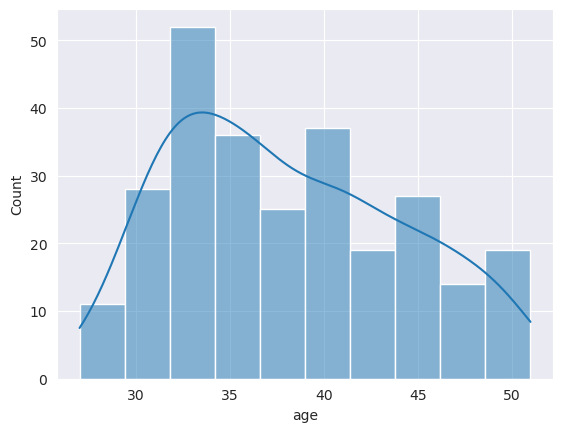

In [75]:
sns.histplot(df['age'],kde=True)

### Najwiecej  osob pracuje w firmie pomiedzy 30 a 40 rokiem zycia

# 5. Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

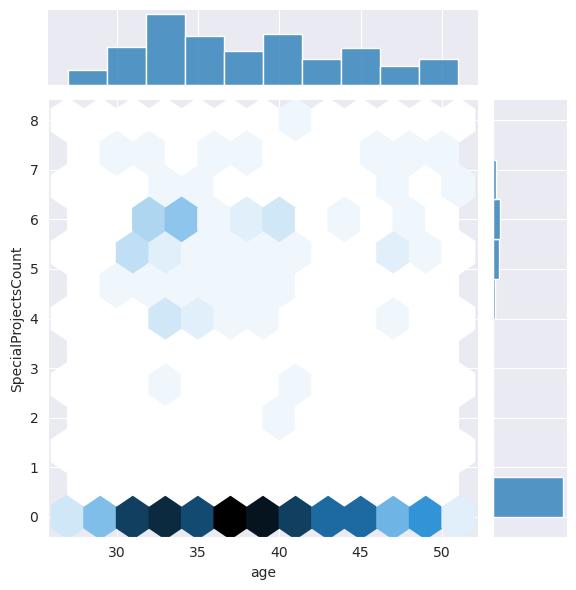

In [86]:
sns.jointplot(x='age',y='SpecialProjectsCount',data=df,kind='hex')

### To mlodsi pracownicy pracuja nad wieksza iloscia specjalnych projektow